<a href="https://colab.research.google.com/github/JaehahShin/ROB-310-Project---Bayesian-Tracking-WIth-Prime-Number/blob/main/Bayesian_Tracking_and_Robot_Simulation_for_Prime_Localization_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created By Jaehah Shin

# Motivation of This Assignments
##### Prime numbers are inherently unpredictable, a characteristic that makes them crucial in modern cryptography. As robotics continues to evolve and integrate with critical and sensitive systems, cryptography plays an increasingly important role in ensuring security.
---

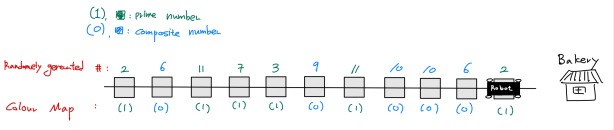

---
## Scenario
A robot designed to transport humans to their desired locations is programmed to deliver its passenger to a point **50 meters beyond the last station**. This is because the **best bakery in the world** is located at that spot! 🍞  

To achieve this, we will use **Bayesian localization** to enable the robot to accurately:  
1. Determine its position along the path.  
2. Identify the last station.  
3. Ensure it stops precisely **50 meters** beyond the final station.  

---

## Assignment Setup

We are working with a series of **21 stations**, each identified by a unique address. The addresses are represented as follows:  
`addresses = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21
]
`  
For simplicity, assume the robot always starts at `addresses[0] = 1` and follows the path sequentially.  

Each station is associated with a randomly generated number. There are two types:
- **Prime numbers** are represented as **1** and displayed in **green**.  
- **Composite numbers** are represented as **0** and displayed in **blue**.  

One important note:  
- The **last station** is always programmed to be a prime number for simplicity.  

---

## Goal of the Assignment

The goal is to determine if a robot can successfully:  
1. **Localize** its position along the path, identifying where the robot is at each step -> In Question 1
2. **Stop** 50 meters after passing the **last station**.  -> In Question 2

# Question 1: Prime Number with Bayesian Tracking of the Number of Primes in a Range


In [ ]:
# This is a library of functions students can use to do this project.
# Make sure students have this installed on their computer. (or use google colab so that they don't need to have it on their local computer)
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import scipy as sp
import numpy as np
from scipy.interpolate import interp1d
import random
import math
import sympy

## Probalibistic Models

In [ ]:
# This is initial colour of topological map of what robot can go.
# As shown below, we use prime and composite numbers to represent the colours.
# This part is given as this is not the main part of the project.
'''NOTE: NOTHING TO DO HERE (READ and UNDERSTAND)'''
from sympy import *

NOTHING = -1
BLUE = 0 # non-prime
GREEN = 1 # prime

code2color = {-1: 'nothing', 0: 'blue', 1: 'green'}

addresses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21]

# Generate a list of random numbers between 2 and 11
random_number = [random.randint(2, 11) for _ in range(20)]

# Ensure the last element is a prime number
while True:
    last_num = random.randint(2, 11)
    if isprime(last_num):
        random_number.append(last_num)
        break
print("Random Numbers:", random_number)

# Generate the initial colors list with default colors (BLUE)
colors = [BLUE if not isprime(num) else GREEN for num in random_number]

print("Colors:", colors)



Random Numbers: [9, 10, 8, 5, 8, 9, 2, 2, 8, 2, 4, 11, 9, 3, 9, 4, 4, 5, 2, 2, 3]
Colors: [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]


### 1.a): Implement following dynamic_pred functions

In [ ]:
'''TODO: Implement the dynamic_pred functions'''
def dynamic_pred(x_k, u_k):
    '''dynamics probability of P(x_k_1 | x_k, u_k) return in form of a state vector'''
    # x_k_1 is an address
    # x_k is an address
    # u_k is -1, 0, 1
    '''
    xk+1 |uk =  -1      0        +1
    X - χ       0.85    0.05    0.05
    X           0.10    0.90    0.10
    X + χ       0.05    0.05    0.85
    '''

In [ ]:
# This is the part where we use miler_rabin_with_confidence function to determine the how much it is confident say that is prime numbers.
# This part is given, students do not need to implement this part.
'''NOTE: NOTHING TO DO HERE (READ and UNDERSTAND)'''

def miller_rabin_with_confidence(n, k=5):
    n = int(n)
    if n <= 1:
        return False, 0  # Randomized confidence for trivial cases
    if n <= 3:
        return True, random.uniform(0.9, 1.0)    #
    if n % 2 == 0:
        return False, random.uniform(0.1, 0.2)  # Randomized confidence for even numbers

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Perform k iterations
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # Composite detected
            confidence1 = random.uniform(0.1, 0.2)  # Randomized confidence for composites
            return False, confidence1

    # If no evidence of compositeness was found, n is probably prime
    confidence2 = 1 - 4**-k
    return True, confidence2


confidences = []

for number in random_number:
    k_iterations = 2

    # Apply Miller-Rabin test for primality
    is_probably_prime, confidence = miller_rabin_with_confidence(number, k_iterations)
    confidences.append(confidence)

    # Output result
    print(f"Result: {number} is {'probably prime' if is_probably_prime else 'composite'} with confidence {confidence:.5f}")

print("Confidences:", confidences)

Result: 9 is composite with confidence 0.19370
Result: 10 is composite with confidence 0.10457
Result: 8 is composite with confidence 0.10136
Result: 5 is probably prime with confidence 0.93750
Result: 8 is composite with confidence 0.15155
Result: 9 is composite with confidence 0.18966
Result: 2 is probably prime with confidence 0.96194
Result: 2 is probably prime with confidence 0.92053
Result: 8 is composite with confidence 0.18992
Result: 2 is probably prime with confidence 0.98056
Result: 4 is composite with confidence 0.10143
Result: 11 is probably prime with confidence 0.93750
Result: 9 is composite with confidence 0.15967
Result: 3 is probably prime with confidence 0.97990
Result: 9 is composite with confidence 0.17197
Result: 4 is composite with confidence 0.12543
Result: 4 is composite with confidence 0.17978
Result: 5 is probably prime with confidence 0.93750
Result: 2 is probably prime with confidence 0.91078
Result: 2 is probably prime with confidence 0.98364
Result: 3 is 

### 1.b) Implement measurment model function

In [ ]:
possible_observations = ['blue', 'green', 'nothing']  # Observed states (z_k)

'''TODO: Implement the measurement model function'''
'''The confidence value that came from previous cell with be used here to determine what measurment model should be used'''

def measurement_model(z_k, x_k, confidence):
    '''Measurement probability of P(z_k | x_k) returned in the form of a state vector'''

    # Dynamically generate measurement probabilities based on confidence
    if confidence > 0.9:  # High confidence
        # Fill the probability arrays for blue_meas and green_meas
        # USE THIS PROBABILITY FOR HIGH CONFIDENCE
        #              | blue green nothing
        '''blue_meas = [0.90, 0.05, 0.05]
           green_meas = [0.05, 0.9, 0.05]'''
        pass
    elif confidence < 0.5:  # Low confidence
        # Fill the probability arrays for blue_meas and green_meas
        # USE THIS PROBABILITY FOR LOW CONFIDENCE
        #              | blue green nothing
        '''blue_meas = [0.5, 0.4, 0.1]
           green_meas = [0.4, 0.5, 0.1] '''
        pass

    # HINT: Measurement probabilities matrix

    # HINT: Return the appropriate measurement probability

'''TODO: DO FOLLOWING STEPS'''
# Iterate through the confidences list and compute probabilities for each observation (z_k)
# Implement the loop and necessary variables (confidences, addresses) yourself

'TODO: DO FOLLOWING STEPS'

## Bayesian Model

### 1.c) Implement state_prediction and bayes_step based on the description

In [ ]:
'''TODO: Implement state_predictions function'''
def state_predictions(x_k, u_k):
    '''return probability of P(x_k_1 | x_k, u_k) in form of a vector'''

In [ ]:
'''TODO: Implement bayes_step function'''
def bayes_step(x_k, u_k, z_k_1):
    '''return probability of P(x_k+1 | x_k, u_k, z_k_1) in form of a vector'''


## Demonstration


### 1.d) Make belief and controls yourself.


In [ ]:
'''TODO: Implement belief and controls urself :)'''
'''HINT: robot will stop **after** the last station'''

'''Randomized Noise Model'''
'''NOTE: Following code is for generating measurments with nose. This is given as this is not the main part of the project.'''
def generate_measurements(colors1):
    """Generate measurements based on colors1 with slight variations, iterating over colors1 twice."""
    measurements = []

    for _ in range(1): # The track is straight line, therefore, we only iterate one time as measurments.
        for color in colors:
            if color == GREEN:
                measurements.append(random.choices([GREEN, NOTHING, BLUE], weights=[90, 5, 5])[0])
            elif color == BLUE:
                measurements.append(random.choices([BLUE, NOTHING, GREEN], weights=[90, 5, 5])[0])

    return measurements
measurements = generate_measurements(colors)
print(f"Measurements: {measurements}")



Measurements: [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, -1, 1, 1, 1]


### 1.e) Implement the code that iterates through the list of control inputs and measurements, updating a list of beliefs using a bayesian update step.

In [ ]:
'''TODO: Implement the code that iterates through the list of control inputs and measurements, updating a list of beliefs using a Bayesian update step.'''

'TODO: Implement the code that iterates through the list of control inputs and measurements, updating a list of beliefs using a Bayesian update step.'

## Visualization of Belief Changes Over Time

### 1.f) Plot the beliefs over time using a bar chart.

In [ ]:
'''TODO: Plot the beliefs over time using a bar chart. The x-axis should be the addresses and the y-axis should be the probabilities. The bars should be colored according to the colors list. The plot should be animated, showing the beliefs at each time step.'''

'TODO: Plot the beliefs over time using a bar chart. The x-axis should be the addresses and the y-axis should be the probabilities. The bars should be colored according to the colors list. The plot should be animated, showing the beliefs at each time step.'

# Question 2: Simulate the robot stopping after passing the final station which is a prime number.

---

## Problem Setup

The following parameters define the system and initial conditions for the robot’s journey:  

- **Mass of the car**: \( m = 2000 \, $\text{kg}$ \)  
- **Sampling period**: \( T = 0.1 \, $\text{s}$ \) (time interval for the car's computer to process measurements and actions)  
- **Measurement-to-action function**: \( $\text{fcn}(\ldots)$ \), a function mapping measurements to the car’s actions  
- **Initial position**: \( d(0) = 0 \, $\text{m}$ \)  
- **Initial velocity**: \( \dot{d}(0) = 130 \, $\text{km/h}$ \)  
- **Last station location**: \( 150 \, $\text{m}$ \) from the initial position  
- **Final halt location**: \( 200 \, $\text{m}$ \) from the initial position  

---

## 2.a) Find A, B, C, and D based on the state-space equation

Let the **state vector** $\mathbf{x}$ be defined as:

$$
\mathbf{x} = \begin{bmatrix}
d \\
\dot{d} \\
D
\end{bmatrix}
$$

where:
- $\mathbf{d}$: Distance between the robot and the last station of prime number (changes over time).
- $\dot{d}$: Rate of change of $d$ (relative velocity of the robot).
- $D$: A constant representing the initial reference distance to the last station of prime number (unchanging).

The **control input** $\mathbf{u}$ represents the robot's acceleration (positive for speeding up, negative for braking). (~= fcn(y) in our code)

The **output vector** $\mathbf{y}$ is defined as:

$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
= \begin{bmatrix}
D - d \\
\dot{d}
\end{bmatrix}
$$

where:
- $y_1$: The remaining distance to the last station of prime number.
- $y_2$: The relative velocity of the robot.

Using the state-space model of the system:

$$
\dot{\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}
$$

$$
\mathbf{y} = \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}
$$


In [ ]:
'''TODO: Find A, B, C, and D based on the state-space equation'''
'''You can do this by hand or use sympy as long as you get correct matrices at the end'''
B = sp.Matrix([0, 1, 0]) # this is given to students as a hint to start


AttributeError: Module 'scipy' has no attribute 'Matrix'

### 2.b): Compute A_d and B_d using **cont2discrete**  within **scipy**. Make sure to use the **zero-order hold** ~ **zoh** for the discretization method.

In [ ]:
'''Compute A_d and B_d using cont2discrete within scipy. Make sure to use the zero-order hold zoh for the discretization method.'''

### 2.c) Implement the simulate_robot_stopping function to simulate the robot

In [ ]:
'''HINT: The simulate_robot_stopping function simulates the robot's movement over time by repeatedly updating its state based on the system dynamics, applying a control signal determined by fnc, and storing the robot's position at each step.
It then provides the time, robot position, and prime number position, which can be used to visualize or analyze the simulation results.'''

def simulate_robot_stopping(x_0, u_0, A, B, C, D, simulation_time, dt, fnc):
  pass

### 2.d) implement function fnc as a control to make the car slow and eventually stop at the end.

In [ ]:
'''HINT: fcn(y) is a control to make the car slow and eventually stop at the end. (constant = 0.0015 make your life easier)'''
def fnc(y):
  pass

#### 2.d.1) Define all the essential varaibles that are given in the question and return function you made in 2.b

In [ ]:
'''TODO: Define all the essential variables that are given in the question'''
pass
'''TODO: Return function you made in 2.b'''
pass

### 2.e) Plot Simulation to show your robot is stopping after passing the last station which is prime number at desired spot.

In [ ]:
'''TODO: Plot Simulation to show your robot is stopping at 200m which is after the last sation which is prime number.'''
'''Show robot slow down and stop at 200m!'''